In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
train = pd.read_csv("titanic_train.csv")

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

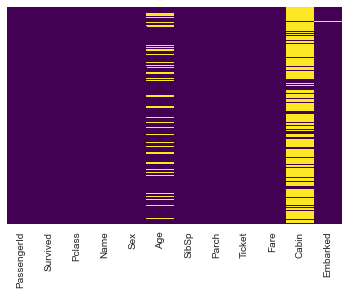

In [36]:
# Creating a heat map to see where we have major missing data

sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap="viridis")

In [37]:
# Set style
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

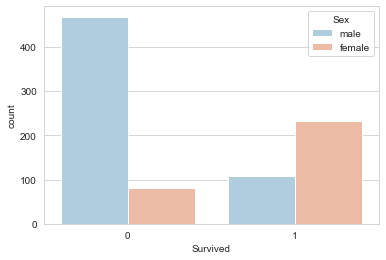

In [38]:
# count of Survivors on the basis of Gendre

sns.countplot(x='Survived', data=train, hue='Sex', palette="RdBu_r")

<b>Passenger who did not survive are mainly males and who  survived are mainly female

<AxesSubplot:xlabel='Survived', ylabel='count'>

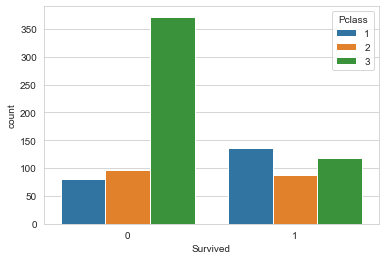

In [39]:
# Count of Survivors on the basis of Passenger Class
sns.countplot(x='Survived', data=train, hue='Pclass')

<b> Passenger who does not survive are majorly from 3 class

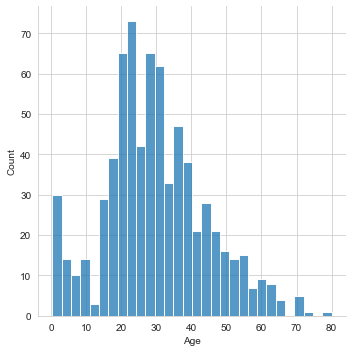

In [40]:
# Distrbution Of Age
sns.displot(train["Age"].dropna(), kde=False, bins=30)

<AxesSubplot:ylabel='Frequency'>

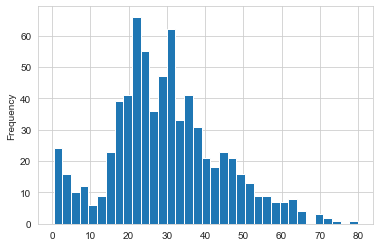

In [41]:
train['Age'].plot.hist(bins=35)

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

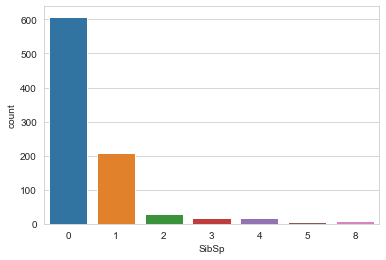

In [43]:
# Count of Passenger with Children or Spouse
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

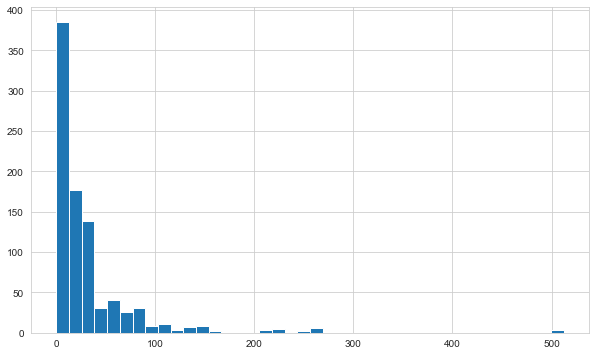

In [44]:
# Distribution of Fares paid by Passenger

train['Fare'].hist(bins=40,figsize=(10,6))

In [45]:
# Using Cufflinks

import cufflinks as cf
cf.go_offline()

train['Fare'].iplot(kind='hist',bins=40)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

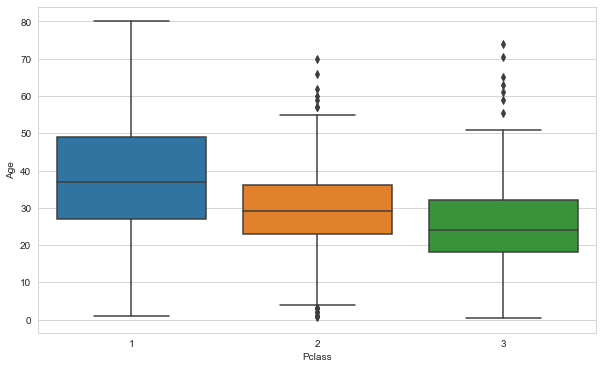

In [46]:
# Creating A box plot for Passenger Class
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age', data=train)

In [47]:
np.round(train[train['Pclass']==1]['Age'].mean())

38.0

In [48]:
# Function to Impute Missing Vlaue of Age

def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return np.round(train[train['Pclass']==1]['Age'].mean())
        elif pclass ==2:
            return np.round(train[train['Pclass']==2]['Age'].mean())
        else:
            return np.round(train[train['Pclass']==3]['Age'].mean())
    else:
        return age


In [49]:
# Imputing The Missing Value of Age in Train Data
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

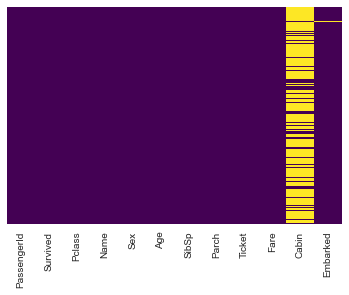

In [50]:
# Replotting the Heatmap for Null values
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap="viridis")

In [51]:
#Dropping the Cabin Column as it has too many missing value to work on

train.drop('Cabin', axis=1, inplace=True)

In [52]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

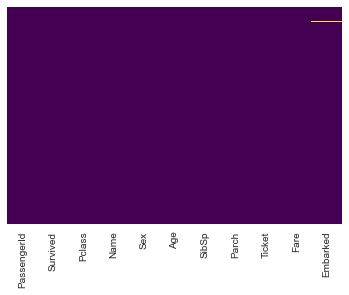

In [53]:
# Replotting the Heatmap for Null values
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap="viridis")

In [54]:
# Droping Any further MissingValue

train.dropna(inplace=True)

<AxesSubplot:>

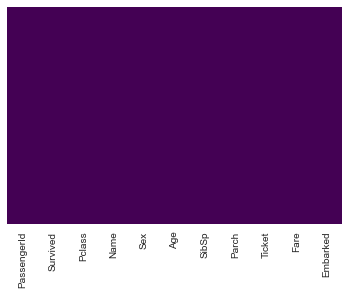

In [55]:
# Replotting the Heatmap for Null values
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap="viridis")

### Now We further Deals with Categorical Features

In [56]:
#Creating a Dumy variable for the Categorical Variable which will indicate the numerical value for the corrosponding
#categorical data.

sex = pd.get_dummies(train['Sex'], drop_first=True)
# Drop_first will remove the First colum ie Feamle, to remoce Multi colineatrity

In [57]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [58]:
# Adding New Column to the DataFrame
train = pd.concat([train, sex, embark], axis=1) 

In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [60]:
# Dropping a column we are not using in Our Model
# Sex, Embark, Name, Ticket, PassengerId

train.drop(['Sex','Embarked','Name','Ticket'], axis=1,inplace=True)

In [61]:
train.drop(['PassengerId'], axis=1,inplace=True)

In [62]:
#train.drop(['male','Q','S'], axis=1,inplace=True)

In [63]:
train.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [64]:
train.shape

(889, 9)

### Test Data

In [65]:
test = pd.read_csv('titanic_test.csv')

In [66]:
test.shape

(418, 11)

In [67]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:>

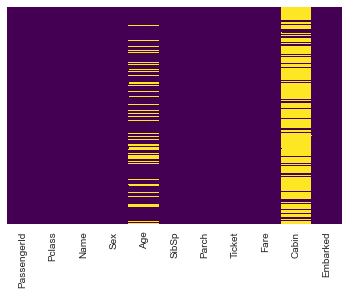

In [68]:
sns.heatmap(test.isnull(),yticklabels=False, cbar=False, cmap="viridis")

In [69]:
# Imputing The Missing Value of Age in test Data
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

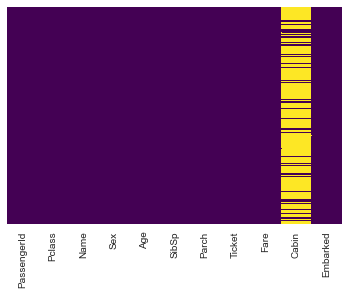

In [70]:
sns.heatmap(test.isnull(),yticklabels=False, cbar=False, cmap="viridis")

In [71]:
#Dropping the Cabin Column as it has too many missing value to work on

test.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

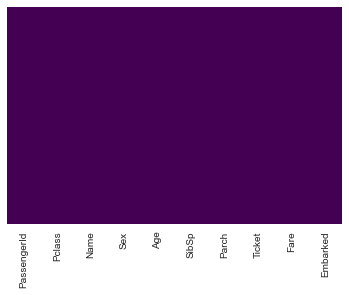

In [72]:
sns.heatmap(test.isnull(),yticklabels=False, cbar=False, cmap="viridis")

In [73]:
#Creating a Dumy variable for the Categorical Variable which will indicate the numerical value for the corrosponding
#categorical data.

sex = pd.get_dummies(test['Sex'], drop_first=True)
embark = pd.get_dummies(test['Embarked'], drop_first=True)

# Adding New Column to the DataFrame
test = pd.concat([test, sex, embark], axis=1) 

test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


In [74]:
# Dropping a column we are not using in Our Model
# Sex, Embark, Name, Ticket, PassengerId

test.drop(['Sex','Embarked','Name','Ticket','PassengerId'], axis=1,inplace=True)
test.tail(5)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
413,3,25.0,0,0,8.0500,1,0,1
414,1,39.0,0,0,108.9000,0,0,0
415,3,38.5,0,0,7.2500,1,0,1
416,3,25.0,0,0,8.0500,1,0,1
417,3,25.0,1,1,22.3583,1,0,0


<AxesSubplot:>

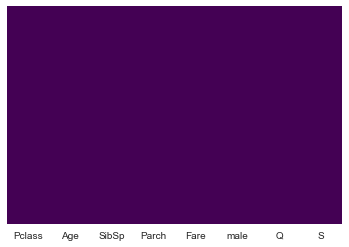

In [75]:
sns.heatmap(test.isnull(),yticklabels=False, cbar=False, cmap="viridis")

In [76]:
test.dropna(inplace=True)

In [77]:
test.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
male      0
Q         0
S         0
dtype: int64

### Dividing The Train Data Into Predictora and Target

In [78]:
X = train.drop('Survived', axis=1) # Predictors
Y = train['Survived']

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

In [80]:
from sklearn.model_selection import train_test_split

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
logmodel = LogisticRegression(max_iter=1000)

In [84]:
# Fitting the Model with the Test Data
logmodel.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [85]:
# Predicting the Target for the Test Predictors
prediction  = logmodel.predict(X_test)

In [86]:
from sklearn.metrics import classification_report

In [87]:
# Classification Report
print(classification_report(Y_test,prediction ))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



In [88]:
# Confusion Metrix

from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test,prediction))

[[150  13]
 [ 31  73]]


In [89]:
# Fitting the Model on Overall Train Data
# Running the Model On Test DataFrame

logmodel.fit(X,Y)


LogisticRegression(max_iter=1000)

In [90]:
Test_Predict = logmodel.predict(test)

In [91]:
sum(Test_Predict)

155